<a href="https://colab.research.google.com/github/SeWonKwon/NLP/blob/main/L10_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](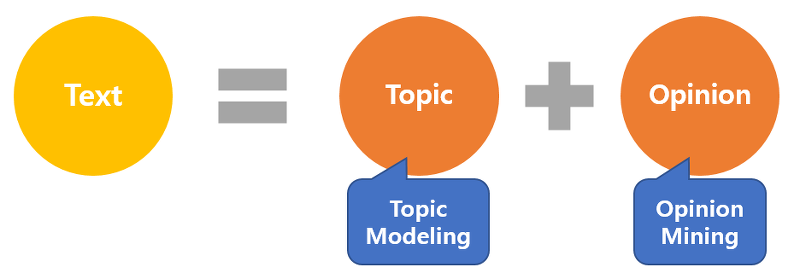)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
!pip install afinn

### 데이터 준비

1.   사용할 데이터를 구성 
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train', remove=('header'))
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [3]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
  print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



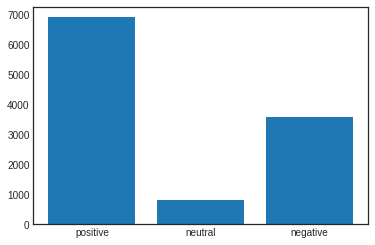

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

positive = 0
neutral = 0 
negative = 0
for i in newsdata.data:
  score = afinn.score(i)
  if score > 0:
    positive += 1
  elif score == 0:
    neutral += 1
  else:
    negative += 1
  
plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])
plt.show()

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [32]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [79]:
import re 
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [80]:
train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [81]:
train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [82]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)


146182
2


In [83]:
print(train_data.isnull().sum())

train_data = train_data.dropna(how='any')
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64
id          0
document    0
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [84]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "")
train_data[:10]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [85]:
train_data['document'].replace('', np.nan, inplace=True)

print(len(train_data))

print(train_data.isnull().sum())

146182
id            0
document    391
label         0
dtype: int64


In [86]:
train_data = train_data.dropna(how='any')
len(train_data)

145791

In [87]:
print(len(test_data))

50000


In [88]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

print(len(test_data))

48995


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [89]:
stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [68]:
mecab = Mecab()

X_train = []
for sentence in train_data['document']:
  X_train.append([word for word in mecab.morphs(sentence) if not word in stop_words])


In [69]:
X_train[:3]

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'],
 ['너무', '재', '밓었다그래서보는것을추천한다']]

In [70]:
X_test = []
for sentence in test_data['document']:
  X_test.append([word for word in mecab.morphs(sentence) if not word in stop_words])


In [71]:
X_test[:3]

[['굳', 'ㅋ'],
 ['뭐', '야', '평점', '나쁘', '진', '않', '지만', '점', '짜리', '더더욱', '아니', '잖아'],
 ['지루', '하', '지', '않', '은데', '완전', '막장', '임', '돈', '주', '고', '보', '기']]

In [72]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '만': 14, '는데': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '정말': 20, '로': 21, '것': 22, '음': 23, '아': 24, '네요': 25, '어': 26, '재밌': 27, '지만': 28, '같': 29, '진짜': 30, '에서': 31, '했': 32, '기': 33, '네': 34, '않': 35, '점': 36, '거': 37, '았': 38, '수': 39, '되': 40, '면': 41, 'ㅋㅋ': 42, '인': 43, '말': 44, '연기': 45, '주': 46, '최고': 47, '내': 48, '평점': 49, '이런': 50, '던': 51, '어요': 52, '할': 53, '왜': 54, '겠': 55, '스토리': 56, '해': 57, 'ㅋㅋㅋ': 58, '습니다': 59, '듯': 60, '아니': 61, '드라마': 62, '생각': 63, '더': 64, '그': 65, '싶': 66, '사람': 67, '때': 68, '감동': 69, '배우': 70, '함': 71, '본': 72, '까지': 73, '뭐': 74, '알': 75, '만들': 76, '내용': 77, '볼': 78, '보다': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '지루': 85, '중': 86, '재미있': 87, '였': 88, '잼': 89, '년': 90, '사랑': 91, '못': 92, '재미없': 93, '냐': 94, '쓰레기': 95, '서': 96, '라고': 97, '니': 98, '면서': 99, '다시': 100, '번': 101, '나오': 102, '하나': 103, '작품': 104, '야': 105, '이거': 1

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [73]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율:{:.4f}'.format((rare_cnt / words_cnt)* 100))
print('희귀 단어 등장 빈도 비율: {:.4f}'.format((rare_freq/ words_freq)*100))

전체 단어 수: 49946
빈도가 2 이하인 희귀 단어 수 : 28320
희귀 단어 비율:56.7012
희귀 단어 등장 빈도 비율: 1.7607


In [74]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

21628


In [75]:
# 위에서 필요한 것만큼의 보캡 사이즈를 지정해서 빈도수 2 이하를 제거한다.
tokenizer = Tokenizer(vocab_size, oov_token='OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [76]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [77]:
print(len(X_train))

145791


In [78]:
# 길이가 1 미만(0이하) 인 train 셋 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0 )
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))

145380


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [90]:
print(len(y_train))

145380


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [91]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train))/ len(X_train))

리뷰 최대 길이: 83
리뷰 평균 길이: 13.80136194799835


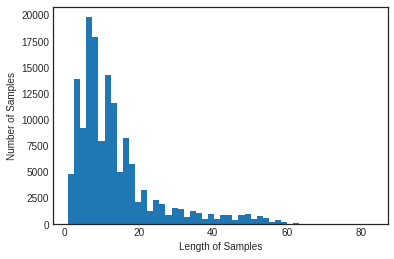

In [92]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [93]:
max_len = 60 

In [94]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [95]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [98]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
               metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2162800   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,280,177
Trainable params: 2,280,177
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(X_train, y_train, epochs=15, batch_size=60, validation_split=0.2)

Epoch 1/15
1939/1939 [==============================] - 45s 20ms/step - loss: 0.3878 - acc: 0.8244 - val_loss: 0.3525 - val_acc: 0.8455
Epoch 2/15
1939/1939 [==============================] - 37s 19ms/step - loss: 0.3201 - acc: 0.8630 - val_loss: 0.3256 - val_acc: 0.8589
Epoch 3/15
1939/1939 [==============================] - 36s 18ms/step - loss: 0.2919 - acc: 0.8767 - val_loss: 0.3158 - val_acc: 0.8645
Epoch 4/15
1939/1939 [==============================] - 37s 19ms/step - loss: 0.2708 - acc: 0.8876 - val_loss: 0.3111 - val_acc: 0.8656
Epoch 5/15
1939/1939 [==============================] - 35s 18ms/step - loss: 0.2536 - acc: 0.8973 - val_loss: 0.3133 - val_acc: 0.8678
Epoch 6/15
1939/1939 [==============================] - 38s 19ms/step - loss: 0.2374 - acc: 0.9045 - val_loss: 0.3214 - val_acc: 0.8648
Epoch 7/15
1939/1939 [==============================] - 38s 19ms/step - loss: 0.2220 - acc: 0.9113 - val_loss: 0.3227 - val_acc: 0.8647
Epoch 8/15
1939/1939 [==========================

In [100]:
model.evaluate(X_test, y_test)

1532/1532 [==============================] - 10s 7ms/step - loss: 0.4978 - acc: 0.8428


[0.4978480637073517, 0.8428410887718201]

#### 시각화

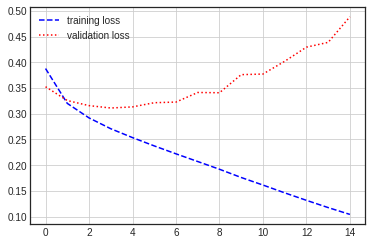

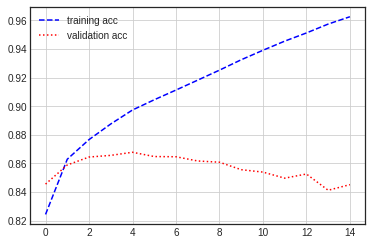

In [101]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training acc')
plt.plot(val_acc, 'r:', label='validation acc')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [110]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stop_words]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen=max_len)
  score = float(model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [112]:
sentiment_predict('정말 재미있고 흥미지진 했어요')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('배우 연기력이 대박입니다.')
sentiment_predict('분위기가 어둡고 스토리가 복잡해요.')
sentiment_predict('이따구로 만들꺼면 하지 말지')

정말 재미있고 흥미지진 했어요 -> 긍정(99.44%)
어떻게 이렇게 지루하고 재미없죠? -> 부정(99.99%)
배우 연기력이 대박입니다. -> 긍정(95.01%)
분위기가 어둡고 스토리가 복잡해요. -> 부정(54.29%)
이따구로 만들꺼면 하지 말지 -> 부정(91.76%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

* https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

In [113]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
                           filename="shopping.txt")

('shopping.txt', <http.client.HTTPMessage at 0x7f2d147693d0>)

In [115]:
total_data = pd.read_table('shopping.txt', names= ('ratings', 'reviews'))
print(len(total_data))

200000


In [116]:
total_data[:10]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


#### 훈련 데이터와 테스트 데이터 분리

In [118]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:10]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,0
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,0
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~,0
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...,0


In [121]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [122]:
total_data['ratings'].value_counts()

5    81177
2    63989
1    36048
4    18786
Name: ratings, dtype: int64

In [123]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

199908


In [134]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(total_data,stratify=total_data['label'], test_size=0.25, random_state=111)
print(len(train_data))
print(len(test_data))
train_data['label'].value_counts()

149931
49977


0    74966
1    74965
Name: label, dtype: int64

#### 레이블의 분포 확인

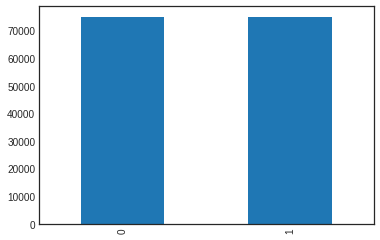

In [135]:
train_data['label'].value_counts().plot(kind='bar')

In [136]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74966
1,1,74965


#### 데이터 정제

In [139]:
train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

149931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [140]:
test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))

49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [141]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [142]:
mecab = Mecab()

train_data['reviews'] = train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] = train_data['reviews'].apply(lambda x : [item for item in x if item not in stopwords ])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [143]:
test_data['reviews'] = test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] = test_data['reviews'].apply(lambda x : [item for item in x if item not in stopwords ])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(149931,) (149931,)
(49977,) (49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [146]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'네요': 1, '좋': 2, '어요': 3, '는데': 4, '아요': 5, '잘': 6, '있': 7, '구매': 8, '안': 9, '습니다': 10, '배송': 11, '했': 12, '너무': 13, '같': 14, '어': 15, '거': 16, '먹': 17, '합니다': 18, '되': 19, '재': 20, '기': 21, '않': 22, '쓰': 23, '아': 24, '것': 25, '없': 26, '요': 27, '해서': 28, '로': 29, '사용': 30, '았': 31, '으로': 32, '보다': 33, '나': 34, '만': 35, '었': 36, '지만': 37, '겠': 38, '해': 39, '주': 40, '아서': 41, '보': 42, '제품': 43, '그냥': 44, '어서': 45, '서': 46, '가격': 47, '면': 48, '만족': 49, '생각': 50, '해요': 51, '좀': 52, '주문': 53, '입니다': 54, '받': 55, '라': 56, '니': 57, '더': 58, '많이': 59, '할': 60, '맛': 61, '사이즈': 62, '때': 63, '시': 64, '에서': 65, '사': 66, '빠르': 67, '작': 68, '샀': 69, '왔': 70, '개': 71, '번': 72, '맛있': 73, '음': 74, '포장': 75, '별로': 76, '두': 77, '수': 78, '던': 79, '맞': 80, '입': 81, '저렴': 82, '괜찮': 83, '다른': 84, '상품': 85, '세요': 86, '아니': 87, '정말': 88, '넘': 89, '데': 90, '하나': 91, '에요': 92, '냄새': 93, '못': 94, '부분': 95, '아주': 96, '딱': 97, 'ㅠㅠ': 98, '감사': 99, '인데': 100, '으면': 101, '용': 102, 'ㅎㅎ': 103, '진짜': 104, '긴': 105, '보내'

In [148]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율:{:.4f}'.format((rare_cnt / words_cnt)* 100))
print('희귀 단어 등장 빈도 비율: {:.4f}'.format((rare_freq/ words_freq)*100))

전체 단어 수: 51298
빈도가 2 이하인 희귀 단어 수 : 33342
희귀 단어 비율:64.9967
희귀 단어 등장 빈도 비율: 1.7474


In [149]:
vocab_size = words_cnt - rare_cnt + 2

print(vocab_size)

17958


In [150]:
toeknizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [151]:
print(X_train[:2])

[[20, 8, 480, 26, 10, 340, 50, 28, 8, 12, 4, 44, 3973, 3788, 533, 185, 162, 538, 3, 763, 1079, 15, 7, 2443, 556, 1101, 7, 5905, 5461, 186, 1372, 1], [20, 8, 115, 60, 102]]


In [152]:
print(X_test[:2])

[[], [134, 2, 5, 103]]


#### 패딩

In [153]:
# 길이가 1 미만(0이하) 인 train 셋 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0 )
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))

149930


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


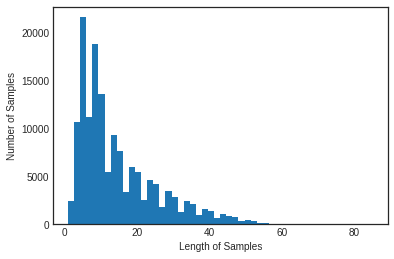

In [154]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [155]:
max_len = 60

In [156]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

In [157]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [158]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [159]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [161]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60,
                    validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - 44s 21ms/step - loss: 0.2826 - acc: 0.8900 - val_loss: 0.2412 - val_acc: 0.9087

Epoch 00001: val_acc improved from -inf to 0.90869, saving model to best_model.h5
Epoch 2/15
2000/2000 [==============================] - 41s 21ms/step - loss: 0.2243 - acc: 0.9163 - val_loss: 0.2259 - val_acc: 0.9146

Epoch 00002: val_acc improved from 0.90869 to 0.91459, saving model to best_model.h5
Epoch 3/15
2000/2000 [==============================] - 39s 20ms/step - loss: 0.2081 - acc: 0.9234 - val_loss: 0.2491 - val_acc: 0.9040

Epoch 00003: val_acc did not improve from 0.91459
Epoch 4/15
2000/2000 [==============================] - 40s 20ms/step - loss: 0.1970 - acc: 0.9280 - val_loss: 0.2291 - val_acc: 0.9151

Epoch 00004: val_acc improved from 0.91459 to 0.91509, saving model to best_model.h5
Epoch 5/15
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1876 - acc: 0.9317 - val_loss: 0.2230 - val_acc: 0.9159

Epoch 00005: 

In [162]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

1562/1562 [==============================] - 11s 7ms/step - loss: 0.2236 - acc: 0.9173


[0.2235826700925827, 0.9172619581222534]

#### 시각화

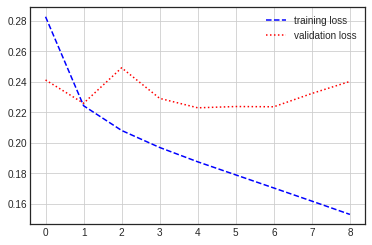

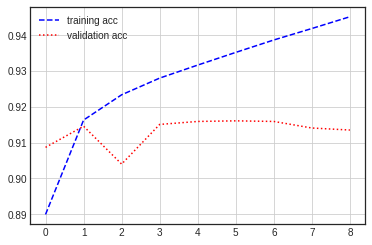

In [163]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training acc')
plt.plot(val_acc, 'r:', label='validation acc')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [78]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stop_words]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen=max_len)
  score = float(loaded_model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [164]:
sentiment_predict('처음 써봤는데 대박 좋아요')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은거 인정! 추가 구매 의향 있습니다.')
sentiment_predict('이건 정말 리뷰 쓰는게 아깝네요')
sentiment_predict('다시 구매 하지 않을거 같아요')

처음 써봤는데 대박 좋아요 -> 긍정(95.79%)
원래 배송이 이렇게 늦나요? -> 부정(99.55%)
좋은거 인정! 추가 구매 의향 있습니다. -> 긍정(88.74%)
이건 정말 리뷰 쓰는게 아깝네요 -> 부정(99.70%)
다시 구매 하지 않을거 같아요 -> 부정(96.74%)
